In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_csv(
    'https://github.com/flaviovdf/evcomp2018/raw/master/data/educ_inc.csv')
df


,Year,Age,Gender,Educational Attainment,Personal Income,Population Count
0,1/1/08 0:00,00 to 17,Male,"College, less than 4-yr degree","C: 10,000 to 14,999",1304
1,1/1/08 0:00,00 to 17,Female,"College, less than 4-yr degree","B: 5,000 to 9,999",1565
2,1/1/08 0:00,65 to 80+,Male,"College, less than 4-yr degree","A: 0 to 4,999",1923
3,1/1/08 0:00,65 to 80+,Female,No high school diploma,"H: 75,000 and over",1981
4,1/1/08 0:00,00 to 17,Female,No high school diploma,"D: 15,000 to 24,999",2009
...,...,...,...,...,...,...
1021,1/1/14 0:00,18 to 64,Female,High school or equivalent,"A: 0 to 4,999",670294
1022,1/1/14 0:00,18 to 64,Male,Bachelor's degree or higher,"G: 50,000 to 74,999",682425
1023,1/1/14 0:00,18 to 64,Female,No high school diploma,"A: 0 to 4,999",723208
1024,1/1/14 0:00,18 to 64,Female,Bachelor's degree or higher,"H: 75,000 and over",953282


In [5]:
#1) Group the table by Educational Attainment and sum the Population Count in each category.
edu_attain = df.groupby('Educational Attainment')[
    'Population Count'].sum()
edu_attain


Educational Attainment
Bachelor's degree or higher       54617676
College, less than 4-yr degree    52137494
High school or equivalent         42942926
No high school diploma            40668871
Name: Population Count, dtype: int64

In [6]:
#2)Analyse the percentage distribution of educational attainment among adult Californians.
percent_distribution = df.loc[df['Age'] != '00 to 17'].groupby(
    'Educational Attainment').sum()
percent_distribution['PERCENT DISTRIBUTION'] = percent_distribution['Population Count'] / \
    percent_distribution['Population Count'].sum() * 100
percent_distribution


,Population Count,PERCENT DISTRIBUTION
Educational Attainment,,
Bachelor's degree or higher,54603003,30.237679
"College, less than 4-yr degree",52045952,28.821652
High school or equivalent,42828045,23.717023
No high school diploma,31102348,17.223646


In [8]:
#3)Using pivot , get a contingency table (a table of counts) of adult Californians cross-classified by Educational Attainment and Personal Income.
temp=df.groupby(['Educational Attainment','Personal Income'],as_index=False).sum("Population Count")
pivot=temp.pivot(index='Personal Income',columns='Educational Attainment',values="Population Count")
pivot

Educational Attainment,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
Personal Income,,,,
"A: 0 to 4,999",3159007,5919391,7123415,16959363
"B: 5,000 to 9,999",2252588,5126391,4437069,5106194
"C: 10,000 to 14,999",2683138,5561141,5099457,5516889
"D: 15,000 to 24,999",5156919,8930143,8578826,6777351
"E: 25,000 to 34,999",4945861,7120357,6108940,3055748
"F: 35,000 to 49,999",7328963,7512053,5609304,1939568
"G: 50,000 to 74,999",10795902,6649798,3950500,930115
"H: 75,000 and over",18295298,5318220,2035415,383643


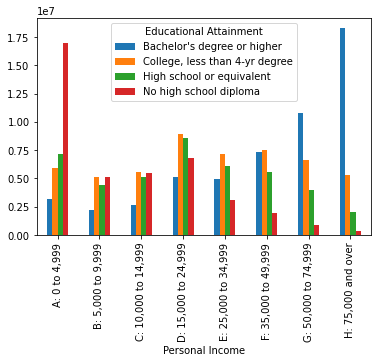

In [9]:
#4)Draw a bar chart to compare the personal income distributions of adult Californians who have no high diploma with those who have completed a Bachelor's degree or higher. (The difference in the distributions would be striking. There is a clear positive association between educational attainment and personal income)
pivot.plot(kind="bar")
